# **Individual Assingment**: Default Credit Cards Clients

A bank in you region want to build a model to predict credit card defaulters more accurately in order minimize money loss. For this task we have a set of data on default payments and demographic data to help us do our task. Data is comprised in the following CSV files:


**TRAINING**

**`train_customers.csv`**
 - `ID`: ID of each client
 - `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
 - `SEX`: Gender (1=male, 2=female)
 - `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
 - `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
 - `AGE`: Age in years
 
**`train_series.csv`**
 - `ID`: ID of each client
 - `MONTH`: The month to wich data is refering
 - `PAY`: Repayment status in the corresponding month (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
 - `BILL_AMT`: Amount of bill statement in the corresponding month (NT dollar)
 - `PAY_AMT`: Amount of previous payment in the corresponding month (NT dollar)
 
**`train_target.csv`**
 - `DEFAULT_JULY`: Default payment in July (1=yes, 0=no)
 
 
**TEST** (For PART 3)
 - **`test_data.csv`**
 
**SUBMISSION** (For PART 3)
 - **`submission_features.csv`**
 
**BACKUP**
 - **`train_data.csv`**

Load all data and answer the following questions

## **A. DATA ENGINEERING (3 points)**

### **Question 1**

(2 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
tr_month = pd.read_csv("data/train_series.csv")
tr_month.shape

(120000, 5)

In [3]:
tr_month.head()

,ID,MONTH,PAY,BILL_AMT,PAY_AMT
0,9910,JUNE,0.0,76885.0,3500.0
1,9910,MAY,0.0,79106.0,4000.0
2,9910,APRIL,0.0,81231.0,3000.0
3,9910,MARCH,0.0,81983.0,3146.0
4,9910,FEBRUARY,0.0,83773.0,3260.0


In [4]:
tr_month["MONTH"].value_counts()

JUNE        20000
MAY         20000
APRIL       20000
MARCH       20000
FEBRUARY    20000
JANUARY     20000
Name: MONTH, dtype: int64

In [5]:
tr_month = pd.pivot_table(tr_month,columns="MONTH", index=["ID"],aggfunc=np.sum)
tr_month.head()

BILL_AMT                                                     PAY  \
MONTH     APRIL  FEBRUARY   JANUARY      JUNE     MARCH       MAY APRIL   
ID                                                                        
0       13600.0   44024.0   18697.0   28991.0       0.0   24391.0   0.0   
1       53169.0   50372.0   49470.0   75662.0   50875.0   70073.0   0.0   
2      161487.0  168094.0  170922.0  155910.0  157577.0  158819.0   2.0   
3           0.0       0.0       0.0   23570.0       0.0     735.0  -2.0   
4        9044.0    9417.0    9617.0    8214.0    9225.0    8034.0   0.0   

                                       PAY_AMT                            \
MONTH FEBRUARY JANUARY JUNE MARCH  MAY   APRIL FEBRUARY  JANUARY    JUNE   
ID                                                                         
0         -1.0     0.0 -1.0   0.0  0.0     0.0    680.0  10000.0  1300.0   
1          0.0     0.0  0.0   0.0  0.0  2000.0   1903.0   2006.0  3212.0   
2          2.0     2.0  2.0   2.0  2.0     0.0   5500.0   1000.0  6800.0   
3         -2.0    -2.0 -2.0  -2.0 -2.0     0.0      0.0      0.0   742.0   
4          0.0     0.0  0.0   0.0  0.0   331.0    356.0    330.0  1140.0   

                        
MONTH    MARCH     MAY  
ID                      
0      22373.0  1000.0  
1       1603.0  2106.0  
2      13000.0  6500.0  
3          0.0     0.0  
4        341.0  1150.0

In [6]:
col_order1 = ["JUNE","MAY","APRIL","MARCH","FEBRUARY","JANUARY",]
tr_month = tr_month.reindex(col_order1, axis=1, level=1)
tr_month.columns = tr_month.columns.map('{0[0]}_{0[1]}'.format) 

In [7]:
tr_month.columns

Index(['BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'BILL_AMT_MARCH',
       'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY', 'PAY_JUNE', 'PAY_MAY',
       'PAY_APRIL', 'PAY_MARCH', 'PAY_FEBRUARY', 'PAY_JANUARY', 'PAY_AMT_JUNE',
       'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'PAY_AMT_MARCH', 'PAY_AMT_FEBRUARY',
       'PAY_AMT_JANUARY'],
      dtype='object')

In [8]:
col_order2 = ['PAY_JUNE', 'PAY_MAY', 'PAY_APRIL', 'PAY_MARCH', 'PAY_FEBRUARY', 'PAY_JANUARY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'BILL_AMT_MARCH',
       'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY',
       'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL', 'PAY_AMT_MARCH', 'PAY_AMT_FEBRUARY',
       'PAY_AMT_JANUARY']
  
tr_month = tr_month.reindex(col_order2, axis=1)
tr_month

,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,PAY_FEBRUARY,PAY_JANUARY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
ID,,,,,,,,,,,,,,,,,,
0,-1.0,0.0,0.0,0.0,-1.0,0.0,28991.0,24391.0,13600.0,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,75662.0,70073.0,53169.0,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0
2,2.0,2.0,2.0,2.0,2.0,2.0,155910.0,158819.0,161487.0,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0
3,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,23570.0,735.0,0.0,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,8214.0,8034.0,9044.0,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1.0,-2.0,-2.0,-1.0,0.0,-1.0,0.0,0.0,0.0,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,47194.0,48381.0,46777.0,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0


### **Question 2**

(0.5 points)

In [9]:
tr_cust = pd.read_csv("data/train_customers.csv")
tr_cust.shape

(20000, 6)

In [10]:
tr_cust.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,9910,130000.0,2,2,1,27
1,15561,60000.0,2,3,1,48
2,23607,330000.0,2,1,2,44
3,6314,60000.0,2,2,2,24
4,27534,180000.0,2,1,2,33


In [11]:
join_month_cust = pd.DataFrame.merge(tr_cust,tr_month,on="ID")
join_month_cust

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
0,9910,130000.0,2,2,1,27,0.0,0.0,0.0,0.0,...,81231.0,81983.0,83773.0,85532.0,3500.0,4000.0,3000.0,3146.0,3260.0,3200.0
1,15561,60000.0,2,3,1,48,-1.0,-1.0,-1.0,-1.0,...,8422.0,4377.0,3910.0,2431.0,5491.0,9683.0,4377.0,3918.0,2431.0,2120.0
2,23607,330000.0,2,1,2,44,0.0,0.0,2.0,0.0,...,253863.0,257535.0,262753.0,268145.0,21400.0,0.0,9400.0,9542.0,9766.0,9786.0
3,6314,60000.0,2,2,2,24,0.0,0.0,0.0,0.0,...,15069.0,15761.0,5879.0,-2879.0,1538.0,1308.0,1000.0,118.0,1329.0,41378.0
4,27534,180000.0,2,1,2,33,-2.0,-2.0,-1.0,-1.0,...,178.0,1500.0,0.0,1118.0,2580.0,178.0,1500.0,0.0,1118.0,1331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28636,330000.0,2,1,2,33,1.0,-2.0,-2.0,-1.0,...,-200.0,150.0,150.0,350.0,0.0,0.0,350.0,0.0,200.0,0.0
19996,17730,50000.0,1,2,2,49,0.0,0.0,0.0,0.0,...,48551.0,34656.0,18077.0,18815.0,2000.0,2124.0,2047.0,5618.0,1000.0,2000.0
19997,28030,410000.0,1,1,2,32,-1.0,0.0,-1.0,-1.0,...,7764.0,623.0,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0
19998,15725,200000.0,1,1,1,40,-2.0,-2.0,-2.0,-2.0,...,5074.0,19268.0,5606.0,2534.0,1772.0,5099.0,19364.0,5634.0,2547.0,33300.0


### **Question 3**

(0.5 points)

In [12]:
tr_target = pd.read_csv("data/train_target.csv")
tr_target.shape

(20000, 2)

In [13]:
tr_target.head()

,ID,DEFAULT_JULY
0,9910,0
1,15561,1
2,23607,1
3,6314,0
4,27534,0


In [14]:
tr_target.index

RangeIndex(start=0, stop=20000, step=1)

In [15]:
santiago_suarez_A_train = pd.DataFrame.merge(join_month_cust,tr_target,on=["ID"],how="left")
santiago_suarez_A_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,DEFAULT_JULY
0,9910,130000.0,2,2,1,27,0.0,0.0,0.0,0.0,...,81983.0,83773.0,85532.0,3500.0,4000.0,3000.0,3146.0,3260.0,3200.0,0
1,15561,60000.0,2,3,1,48,-1.0,-1.0,-1.0,-1.0,...,4377.0,3910.0,2431.0,5491.0,9683.0,4377.0,3918.0,2431.0,2120.0,1
2,23607,330000.0,2,1,2,44,0.0,0.0,2.0,0.0,...,257535.0,262753.0,268145.0,21400.0,0.0,9400.0,9542.0,9766.0,9786.0,1
3,6314,60000.0,2,2,2,24,0.0,0.0,0.0,0.0,...,15761.0,5879.0,-2879.0,1538.0,1308.0,1000.0,118.0,1329.0,41378.0,0
4,27534,180000.0,2,1,2,33,-2.0,-2.0,-1.0,-1.0,...,1500.0,0.0,1118.0,2580.0,178.0,1500.0,0.0,1118.0,1331.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28636,330000.0,2,1,2,33,1.0,-2.0,-2.0,-1.0,...,150.0,150.0,350.0,0.0,0.0,350.0,0.0,200.0,0.0,0
19996,17730,50000.0,1,2,2,49,0.0,0.0,0.0,0.0,...,34656.0,18077.0,18815.0,2000.0,2124.0,2047.0,5618.0,1000.0,2000.0,1
19997,28030,410000.0,1,1,2,32,-1.0,0.0,-1.0,-1.0,...,623.0,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0,0
19998,15725,200000.0,1,1,1,40,-2.0,-2.0,-2.0,-2.0,...,19268.0,5606.0,2534.0,1772.0,5099.0,19364.0,5634.0,2547.0,33300.0,0


In [16]:
import os  
os.makedirs('outputs', exist_ok=True)  
santiago_suarez_A_train.to_csv('outputs/santiago_suarez_A_train.csv')

## **B. EXPLORATORY DATA ANALYSIS (2 points)**

In [17]:
import matplotlib.pyplot as plt

In [18]:
train_data = santiago_suarez_A_train

In [19]:
train_data["EDUCATION"].max()

6

### **Question 1**

(0.5 points)

In [20]:
grad = train_data[(train_data["EDUCATION"]==1)]
uni = train_data[(train_data["EDUCATION"]==2)]
hs = train_data[(train_data["EDUCATION"]==3)]
other = train_data[(train_data["EDUCATION"]==4)]
unknown = train_data[(train_data["EDUCATION"]==5)]

In [21]:
grad.min()

ID                        2.0
LIMIT_BAL             10000.0
SEX                       1.0
EDUCATION                 1.0
MARRIAGE                  0.0
AGE                      21.0
PAY_JUNE                 -2.0
PAY_MAY                  -2.0
PAY_APRIL                -2.0
PAY_MARCH                -2.0
PAY_FEBRUARY             -2.0
PAY_JANUARY              -2.0
BILL_AMT_JUNE        -14386.0
BILL_AMT_MAY         -24704.0
BILL_AMT_APRIL      -157264.0
BILL_AMT_MARCH       -81334.0
BILL_AMT_FEBRUARY    -81334.0
BILL_AMT_JANUARY     -73895.0
PAY_AMT_JUNE              0.0
PAY_AMT_MAY               0.0
PAY_AMT_APRIL             0.0
PAY_AMT_MARCH             0.0
PAY_AMT_FEBRUARY          0.0
PAY_AMT_JANUARY           0.0
DEFAULT_JULY              0.0
dtype: float64

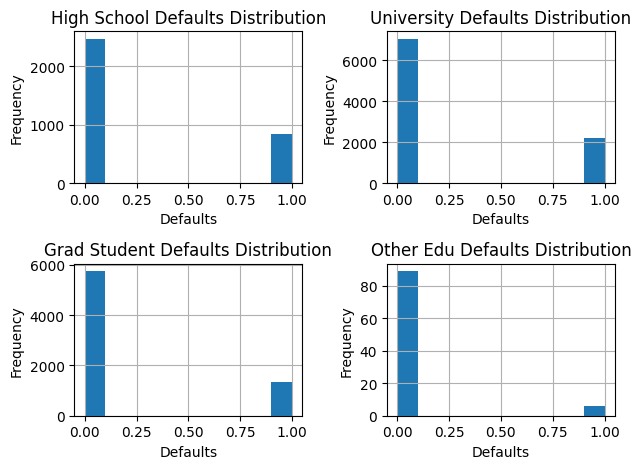

In [22]:
# Create the subplots
fig, axes = plt.subplots(2, 2)

# Plot the histograms
hs["DEFAULT_JULY"].hist(ax=axes[0][0])
uni["DEFAULT_JULY"].hist(ax=axes[0][1])
grad["DEFAULT_JULY"].hist(ax=axes[1][0])
other["DEFAULT_JULY"].hist(ax=axes[1][1])

# Add labels and title
axes[0][0].set_xlabel('Defaults')
axes[0][0].set_ylabel('Frequency')
axes[0][0].set_title('High School Defaults Distribution')

axes[0][1].set_xlabel('Defaults')
axes[0][1].set_ylabel('Frequency')
axes[0][1].set_title('University Defaults Distribution')

axes[1][0].set_xlabel('Defaults')
axes[1][0].set_ylabel('Frequency')
axes[1][0].set_title('Grad Student Defaults Distribution')

axes[1][1].set_xlabel('Defaults')
axes[1][1].set_ylabel('Frequency')
axes[1][1].set_title('Other Edu Defaults Distribution')

# Show the graph
fig.tight_layout()
plt.show()

In [23]:
#The distributions show that the most common client in the dataset are University students, then graduates.
#We can also see through the distributions, that the more you've studied, the less likely you won't pay back a loan
#This is with the exception of other, which is extremely low compared to the other three

### **Question 2**

(0.5 points)

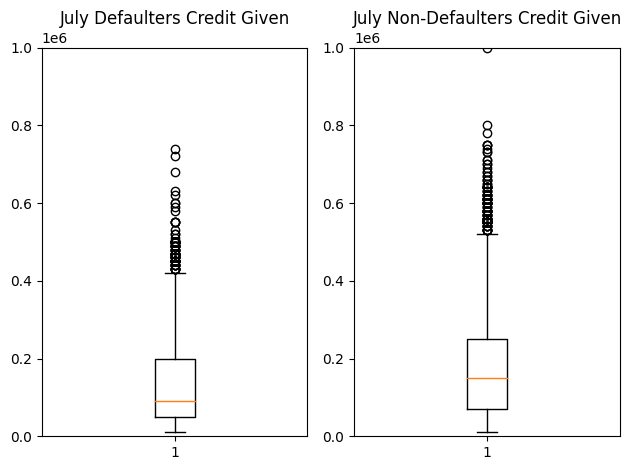

In [24]:
lim_def = train_data[train_data["DEFAULT_JULY"]==1]
lim_not_def = train_data[train_data["DEFAULT_JULY"]==0]

fig1, axes = plt.subplots(1,2)

axes[0].set_title('July Defaulters Credit Given')
axes[1].set_title('July Non-Defaulters Credit Given')
axes[0].boxplot(lim_def["LIMIT_BAL"])
axes[1].boxplot(lim_not_def["LIMIT_BAL"])

#set y axes range
axes[0].set_ylim([0, 1000000])
axes[1].set_ylim([0, 1000000])

fig1.tight_layout()

In [25]:
#As expected, peeople that don't default on loan payments are given higher amounts of credit on average than 
#people that default
#This can be seen in the 25%, mean, 75% and the maximum values, which are all higher in the non-defaulters

### **Question 3**

(1 point)

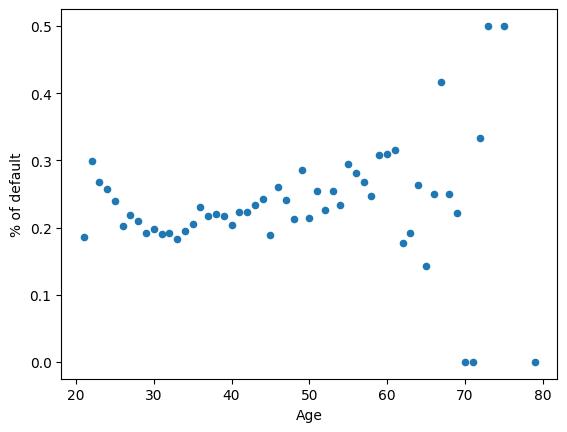

In [52]:
grouped = train_data.groupby('AGE')['DEFAULT_JULY'].mean().reset_index()

# Create a scatter plot of the age and the average binary per age
ax = grouped.plot.scatter(x='AGE', y='DEFAULT_JULY')

# Set axis labels
ax.set_xlabel('Age')
ax.set_ylabel('% of default')
plt.show()


It seems that the **youngest** clients are slightly more likely to default than **middle aged** people, but as age increases to **50+**, the percentage of defaults rise again.

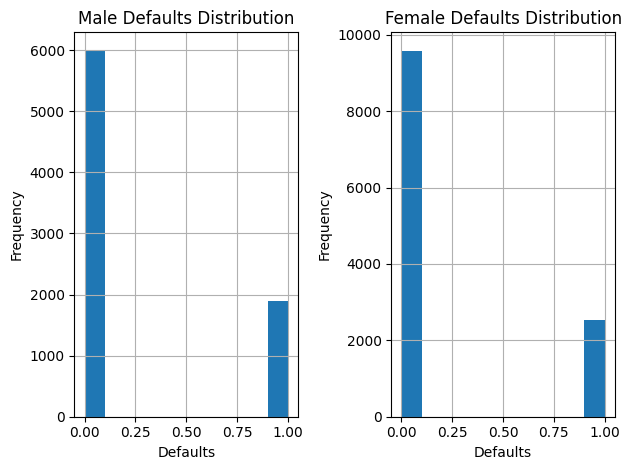

In [55]:
male = train_data[(train_data["SEX"]==1)]
female = train_data[(train_data["SEX"]==2)]

# Create the subplots
fig, axes = plt.subplots(1, 2)

# Plot the histograms
male["DEFAULT_JULY"].hist(ax=axes[0])
female["DEFAULT_JULY"].hist(ax=axes[1])

# Add labels and title
axes[0].set_xlabel('Defaults')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Male Defaults Distribution')

axes[1].set_xlabel('Defaults')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Female Defaults Distribution')

# Show the graph
fig.tight_layout()
plt.show()

It seems like gender has no significant impact on defaulting, even though **men** seem to 

## **C. MACHINE LEARNING (5 points)**

In [26]:
test_data = pd.read_csv("data/test_data.csv")
submissions_features = pd.read_csv("data/submission_features.csv")

In [27]:
test_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_JUNE',
       'PAY_MAY', 'PAY_APRIL', 'PAY_MARCH', 'PAY_FEBRUARY', 'PAY_JANUARY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'BILL_AMT_MARCH',
       'BILL_AMT_FEBRUARY', 'BILL_AMT_JANUARY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL', 'PAY_AMT_MARCH', 'PAY_AMT_FEBRUARY', 'PAY_AMT_JANUARY',
       'DEFAULT_JULY'],
      dtype='object')

In [28]:
submissions_features.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_JUNE,PAY_MAY,PAY_APRIL,PAY_MARCH,...,BILL_AMT_APRIL,BILL_AMT_MARCH,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,PAY_AMT_MARCH,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY
0,2774,70000.0,2,3,2,22,0,0,0,0,...,37858.0,29660.0,29519.0,29457.0,1726.0,3028.0,1026.0,1195.0,1060.0,1031.0
1,15339,100000.0,2,2,1,38,1,2,0,0,...,15323.0,16268.0,15868.0,16448.0,0.0,1600.0,1500.0,0.0,1000.0,1500.0
2,26485,140000.0,2,1,2,40,1,2,0,0,...,128285.0,123074.0,97382.0,99364.0,0.0,6601.0,5522.0,3200.0,3300.0,3500.0
3,6657,380000.0,2,2,2,27,0,0,-1,0,...,270219.0,3641.0,3717.0,3791.0,0.0,270219.0,131.0,135.0,136.0,76.0
4,7917,100000.0,1,2,2,26,0,0,0,0,...,33680.0,34419.0,37782.0,76185.0,2000.0,2000.0,2000.0,4500.0,40000.0,3000.0


### **Question 1**

(1.5 points)

Create the model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [30]:
rf = RandomForestClassifier(
    n_estimators=1000,
    random_state=42
)
X = train_data.drop("DEFAULT_JULY", axis=1)
y = train_data["DEFAULT_JULY"]
rf.fit(X,y)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [31]:
x_test = test_data.drop("DEFAULT_JULY", axis=1)
y_test = test_data["DEFAULT_JULY"]
test_pred = rf.predict_proba(x_test)

In [32]:
print("ROC AUC Score: ", roc_auc_score(y_test, test_pred[:,1]))

ROC AUC Score:  0.7706921121504691


Predictions on submissions_features

In [33]:
y_pred = rf.predict_proba(submissions_features)
y_pred

array([[0.851, 0.149],
       [0.531, 0.469],
       [0.772, 0.228],
       ...,
       [0.864, 0.136],
       [0.452, 0.548],
       [0.878, 0.122]])

In [34]:
predictions = pd.DataFrame({"ID":submissions_features["ID"],"Prediction":y_pred[:,1]})
predictions.to_csv('outputs/santiago_suarez_C1_submission.csv')
predictions

,ID,Prediction
0,2774,0.149
1,15339,0.469
2,26485,0.228
3,6657,0.195
4,7917,0.082
...,...,...
995,2501,0.075
996,676,0.180
997,26934,0.136
998,27956,0.548


### **Question 2**

(1 points)

In [35]:
predictions["Prediction"].nlargest(5)

836    0.987
175    0.984
249    0.974
337    0.901
36     0.891
Name: Prediction, dtype: float64

### **Question 3**

(2.5 points)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [38]:
best_profit = 0
opt_thresh = 0
for i in range(1,1000):
    thresh = i/1000
    cm = confusion_matrix(y_test, test_pred[:,1]> thresh)

    #calculating profit
    profit = cm[0,0]*1000 - cm[1,0]*5000
    if profit > best_profit:
        best_profit = profit
        opt_thresh = thresh

In [39]:
print(opt_thresh)
print(best_profit)

0.159
1865000


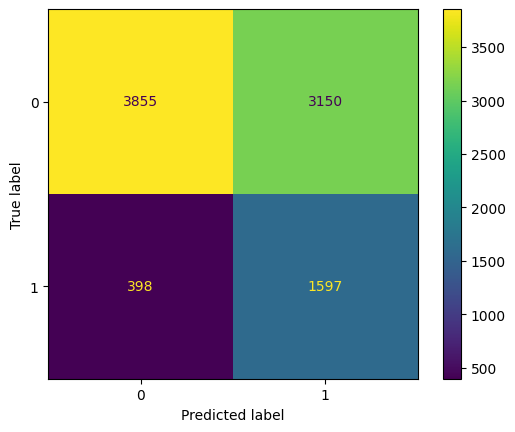

In [50]:
#creating the confusion matrix

cm = confusion_matrix(y_test, test_pred[:,1] > opt_thresh)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, test_pred[:,1], pos_label=rf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, test_pred[:,1], pos_label=rf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

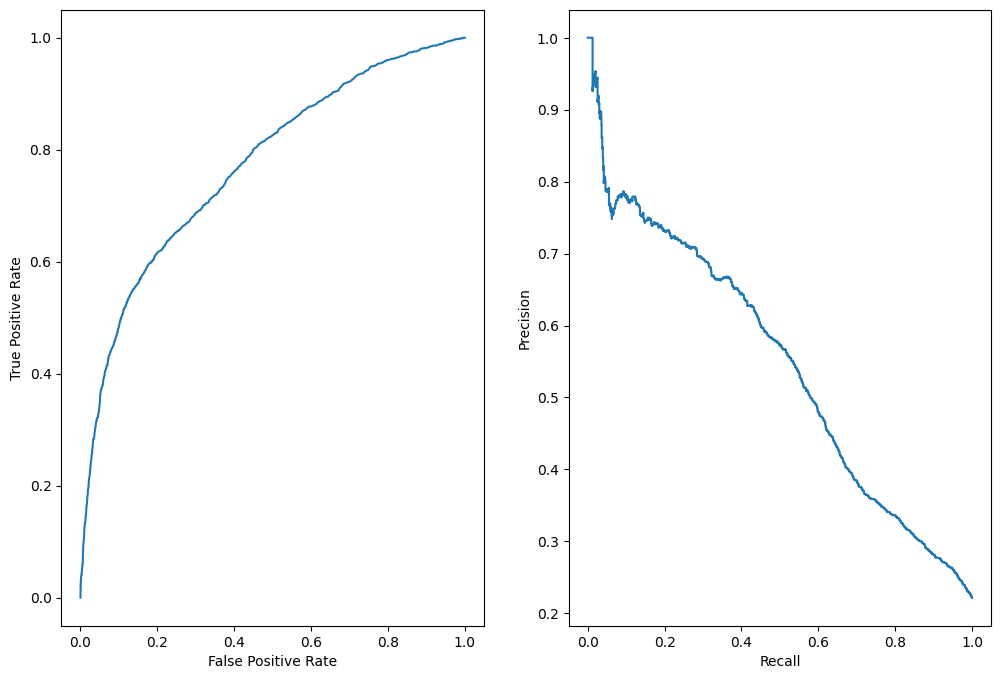

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()